# **Proyecto 2 – Parte I (Core)**

# **Clasificación basada en arboles**

### **Proyecto 2: Análisis del Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para el dataset elegido, el EDA inicial y la problemática seleccionada.

# Parte I: Búsqueda y Análisis de Conjuntos de Datos

### **1. Búsqueda de Conjuntos de Datos:**


Datasets seleccionado:


Ataque al corazon:

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download



### **Análisis Exploratorio de Datos (EDA) Inicial:**
- Realizar un EDA para datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.


In [ ]:
# Importamos las librerias necesarias para analizar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analisis EDA - Ataque al Corazon

In [ ]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_heart=pd.read_csv("heart.csv")
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,NaN,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       298 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df_heart.isna().sum()

,0
age,1
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


la columna 'age' tiene un valor nulo

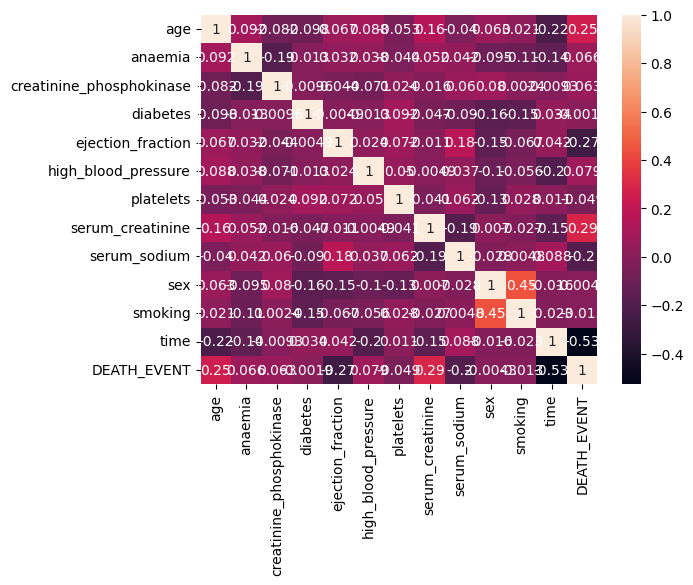

In [ ]:
# Grafiremos un Mapa de Calor para buscar correlaciones
sns.heatmap(df_heart.corr(), annot=True)
plt.show()

El grafico muestra que no existen correspondencia fuerte entre las variables.

Personalmente, tenderia a pensar que la edad podria ser un factor preponderante con esta enfermedad, por no se ve en el mapa

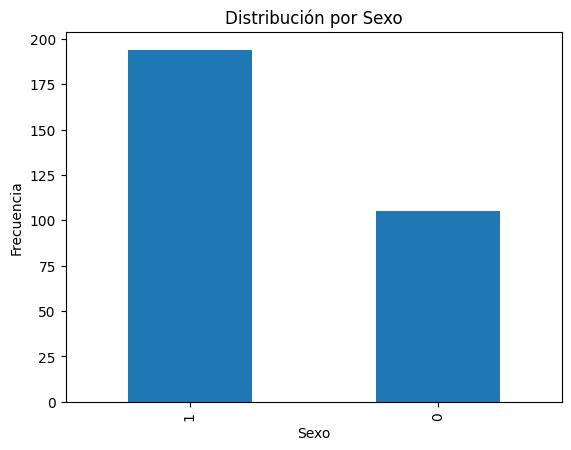

In [ ]:
# Hacemos un grafico para ver distribucion por sexo
df_heart['sex'].value_counts().plot(kind='bar')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoria de los pacientes son hombres

In [ ]:
# obtengo estadistica de variables numericas
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,298.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.786356,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.886333,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


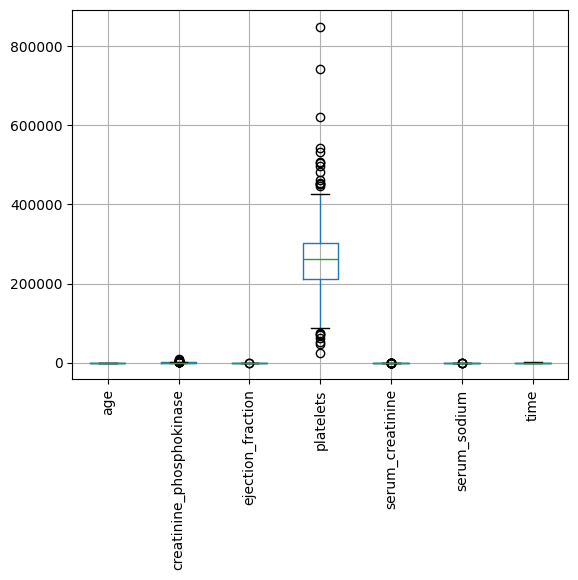

In [ ]:
# Boxplot para analizar las columnas
df_heart.boxplot(column=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

La columna 'platelets' presenta muchos datos outliers.